In [24]:
import pandas as pd
import matplotlib as plt

In [25]:
data = pd.read_csv('ALLHPD_DATA.csv')

In [26]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         364 non-null    object 
 1   H_pm25       359 non-null    float64
 2   H_pm10       90 non-null     object 
 3   H_o3         359 non-null    object 
 4   H_no2        359 non-null    object 
 5   H_so2        359 non-null    object 
 6   H_co         359 non-null    object 
 7   Unnamed: 7   0 non-null      float64
 8   date.1       362 non-null    object 
 9   D_pm25       362 non-null    object 
 10  D_pm10       362 non-null    object 
 11  D_o3         362 non-null    object 
 12  D_no2        362 non-null    object 
 13  D_so2        362 non-null    object 
 14  D_co         362 non-null    object 
 15  Unnamed: 15  0 non-null      float64
 16  date.2       364 non-null    object 
 17  P_pm25       181 non-null    float64
 18  P_pm10       181 non-null    object 
 19  P_o3    

In [27]:
data.columns

Index(['date', 'H_pm25', 'H_pm10', 'H_o3', 'H_no2', 'H_so2', 'H_co',
       'Unnamed: 7', 'date.1', 'D_pm25', 'D_pm10', 'D_o3', 'D_no2', 'D_so2',
       'D_co', 'Unnamed: 15', 'date.2', 'P_pm25', 'P_pm10', 'P_o3', 'P_no2',
       'P_so2', 'P_co'],
      dtype='object')

In [28]:
data = data.drop(['Unnamed: 7','Unnamed: 15'],axis=1)

In [29]:
data.columns

Index(['date', 'H_pm25', 'H_pm10', 'H_o3', 'H_no2', 'H_so2', 'H_co', 'date.1',
       'D_pm25', 'D_pm10', 'D_o3', 'D_no2', 'D_so2', 'D_co', 'date.2',
       'P_pm25', 'P_pm10', 'P_o3', 'P_no2', 'P_so2', 'P_co'],
      dtype='object')

In [30]:
data['D_co'] = pd.to_numeric(data['D_co'], errors='coerce')
data['D_pm25'] = pd.to_numeric(data['D_pm25'], errors='coerce')
data['D_pm10'] = pd.to_numeric(data['D_pm10'], errors='coerce')
data['D_o3'] = pd.to_numeric(data['D_o3'], errors='coerce')
data['D_no2'] = pd.to_numeric(data['D_no2'], errors='coerce')
data['D_so2'] = pd.to_numeric(data['D_so2'], errors='coerce')
data['P_co'] = pd.to_numeric(data['P_co'], errors='coerce')
data['P_pm25'] = pd.to_numeric(data['P_pm25'], errors='coerce')
data['P_pm10'] = pd.to_numeric(data['P_pm10'], errors='coerce')
data['P_o3'] = pd.to_numeric(data['P_o3'], errors='coerce')
data['P_no2'] = pd.to_numeric(data['P_no2'], errors='coerce')
data['P_so2'] = pd.to_numeric(data['P_so2'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    364 non-null    object 
 1   H_pm25  359 non-null    float64
 2   H_pm10  90 non-null     object 
 3   H_o3    359 non-null    object 
 4   H_no2   359 non-null    object 
 5   H_so2   359 non-null    object 
 6   H_co    359 non-null    object 
 7   date.1  362 non-null    object 
 8   D_pm25  321 non-null    float64
 9   D_pm10  360 non-null    float64
 10  D_o3    360 non-null    float64
 11  D_no2   355 non-null    float64
 12  D_so2   359 non-null    float64
 13  D_co    357 non-null    float64
 14  date.2  364 non-null    object 
 15  P_pm25  181 non-null    float64
 16  P_pm10  179 non-null    float64
 17  P_o3    175 non-null    float64
 18  P_no2   177 non-null    float64
 19  P_so2   164 non-null    float64
 20  P_co    72 non-null     float64
dtypes: float64(13), object(8)
memory usage:

In [37]:
data = data.drop(['date.1','date.2'],axis=1)

KeyError: "['date.1' 'date.2'] not found in axis"

In [ ]:
data.plot(figsize=(20,10))

In [ ]:
data.plot(figsize=(20,10),kind='bar')

In [ ]:
data['date']= pd.to_datetime(data['date'])
data = data.set_index('date')

In [ ]:
data = data.set_index('date')

In [38]:
data

,H_pm25,H_pm10,H_o3,H_no2,H_so2,H_co,D_pm25,D_pm10,D_o3,D_no2,D_so2,D_co,P_pm25,P_pm10,P_o3,P_no2,P_so2,P_co
date,,,,,,,,,,,,,,,,,,
2016-09-01,85.0,NaN,9,6,3,4,76.0,69.0,7.0,18.0,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-02,120.0,NaN,9,7,3,5,119.0,78.0,12.0,17.0,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-03,142.0,NaN,8,5,2,6,124.0,84.0,7.0,14.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-04,133.0,NaN,9,5,2,7,126.0,82.0,11.0,12.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-05,137.0,NaN,14,6,4,5,123.0,91.0,7.0,14.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,177.0,NaN,41,7,19,11,169.0,125.0,61.0,22.0,5.0,11.0,137.0,55.0,8.0,26.0,3.0,NaN
2019-11-27,136.0,NaN,19,7,10,9,131.0,91.0,16.0,22.0,6.0,7.0,98.0,44.0,7.0,23.0,2.0,NaN
2019-11-28,90.0,NaN,28,7,15,12,79.0,49.0,16.0,8.0,5.0,3.0,98.0,44.0,6.0,21.0,2.0,NaN


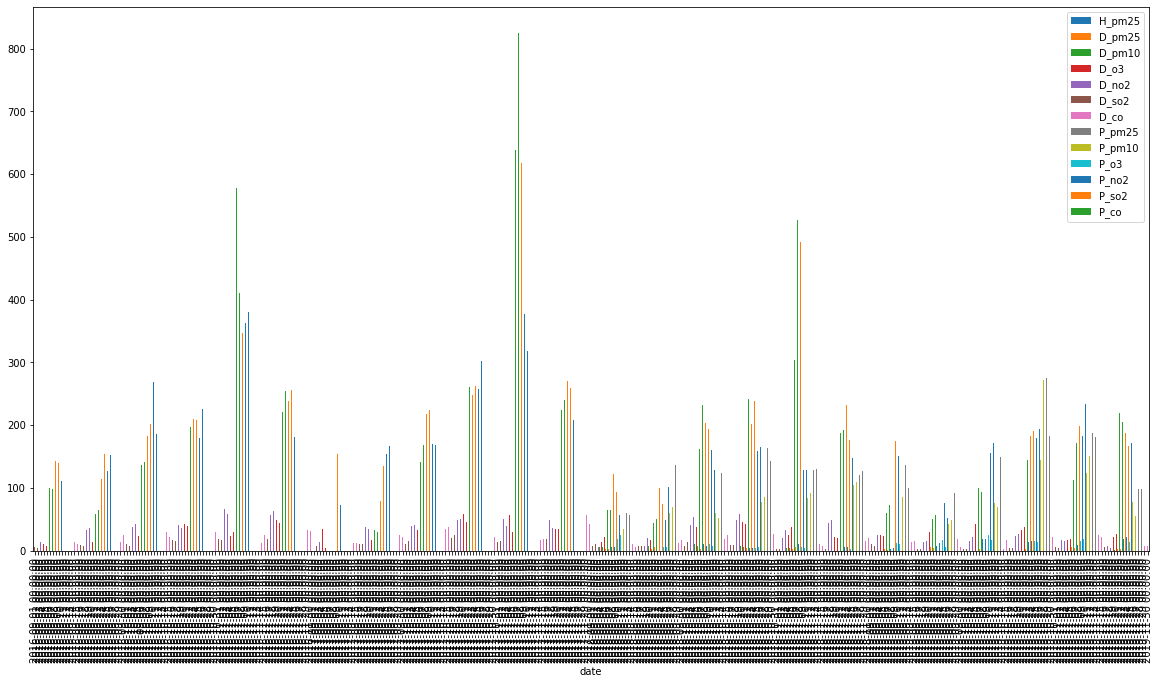

In [39]:
data.plot(figsize=(20,10),kind='bar')

In [43]:
data.isnull().sum()

H_pm25      0
H_pm10     91
H_o3        0
H_no2       0
H_so2       0
H_co        0
D_pm25      0
D_pm10      0
D_o3        0
D_no2       0
D_so2       0
D_co        0
P_pm25    183
P_pm10    185
P_o3      189
P_no2     187
P_so2     200
P_co      292
dtype: int64

In [44]:
data[['D_pm25','D_pm10','D_o3','D_no2','D_so2','D_co']]=data[['D_pm25','D_pm10','D_o3','D_no2','D_so2','D_co']].bfill()
data[['H_pm25','H_pm10','H_o3','H_no2','H_so2','H_co']]=data[['H_pm25','H_pm10','H_o3','H_no2','H_so2','H_co']].bfill()

In [45]:
data.isnull().sum()

H_pm25      0
H_pm10     91
H_o3        0
H_no2       0
H_so2       0
H_co        0
D_pm25      0
D_pm10      0
D_o3        0
D_no2       0
D_so2       0
D_co        0
P_pm25    183
P_pm10    185
P_o3      189
P_no2     187
P_so2     200
P_co      292
dtype: int64

In [46]:
data = data.bfill()

In [48]:
data.isnull().sum()
data.to_csv(r'/home/umer/Desktop/Air_MIMI_PRO/Stubble-master/ALLHDPD.csv',index=True,header=True)


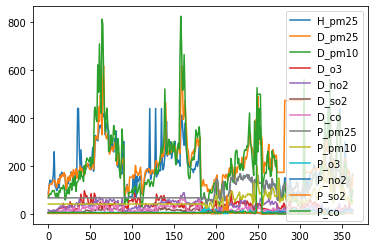

In [20]:
data.plot()

In [21]:
data.all()

date      True
H_pm25    True
H_pm10    True
H_o3      True
H_no2     True
H_so2     True
H_co      True
D_pm25    True
D_pm10    True
D_o3      True
D_no2     True
D_so2     True
D_co      True
P_pm25    True
P_pm10    True
P_o3      True
P_no2     True
P_so2     True
P_co      True
dtype: bool

In [22]:
data

,date,H_pm25,H_pm10,H_o3,H_no2,H_so2,H_co,D_pm25,D_pm10,D_o3,D_no2,D_so2,D_co,P_pm25,P_pm10,P_o3,P_no2,P_so2,P_co
0,2016-09-01,85.0,42,9,6,3,4,76.0,69.0,7.0,18.0,5.0,8.0,68.0,42.0,7.0,5.0,3.0,6.0
1,2016-09-02,120.0,42,9,7,3,5,119.0,78.0,12.0,17.0,4.0,7.0,68.0,42.0,7.0,5.0,3.0,6.0
2,2016-09-03,142.0,42,8,5,2,6,124.0,84.0,7.0,14.0,5.0,5.0,68.0,42.0,7.0,5.0,3.0,6.0
3,2016-09-04,133.0,42,9,5,2,7,126.0,82.0,11.0,12.0,4.0,5.0,68.0,42.0,7.0,5.0,3.0,6.0
4,2016-09-05,137.0,42,14,6,4,5,123.0,91.0,7.0,14.0,5.0,5.0,68.0,42.0,7.0,5.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2019-11-26,177.0,NaN,41,7,19,11,169.0,125.0,61.0,22.0,5.0,11.0,137.0,55.0,8.0,26.0,3.0,NaN
360,2019-11-27,136.0,NaN,19,7,10,9,131.0,91.0,16.0,22.0,6.0,7.0,98.0,44.0,7.0,23.0,2.0,NaN
361,2019-11-28,90.0,NaN,28,7,15,12,79.0,49.0,16.0,8.0,5.0,3.0,98.0,44.0,6.0,21.0,2.0,NaN
362,2019-11-29,133.0,NaN,30,7,12,14,114.0,72.0,17.0,17.0,7.0,8.0,83.0,40.0,10.0,17.0,1.0,NaN


In [49]:
data.isnull().sum()

H_pm25     0
H_pm10    91
H_o3       0
H_no2      0
H_so2      0
H_co       0
D_pm25     0
D_pm10     0
D_o3       0
D_no2      0
D_so2      0
D_co       0
P_pm25     0
P_pm10     0
P_o3       0
P_no2      0
P_so2      0
P_co      10
dtype: int64

In [94]:
d = data[['H_so2','D_so2']]

In [100]:
d.isnull().sum()

H_so2    17
D_so2     0
dtype: int64

In [108]:
d

,H_so2,D_so2
date,,
2016-09-01,3.0,5.0
2016-09-02,3.0,4.0
2016-09-03,2.0,5.0
2016-09-04,2.0,4.0
2016-09-05,4.0,5.0
...,...,...
2019-11-26,19.0,5.0
2019-11-27,10.0,6.0
2019-11-28,15.0,5.0


In [107]:
d['H_so2'] = pd.to_numeric(d['H_so2'], errors='coerce')
d['H_so2']=d['H_so2'].bfill() 



/home/umer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/umer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,H_so2,D_so2
date,,
2016-09-01,3.0,5.0
2016-09-02,3.0,4.0
2016-09-03,2.0,5.0
2016-09-04,2.0,4.0
2016-09-05,4.0,5.0
...,...,...
2019-11-26,19.0,5.0
2019-11-27,10.0,6.0
2019-11-28,15.0,5.0


In [106]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

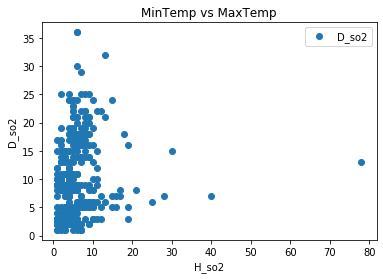

In [109]:
d.plot(x='H_so2', y='D_so2', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('H_so2')  
plt.ylabel('D_so2')  
plt.show()

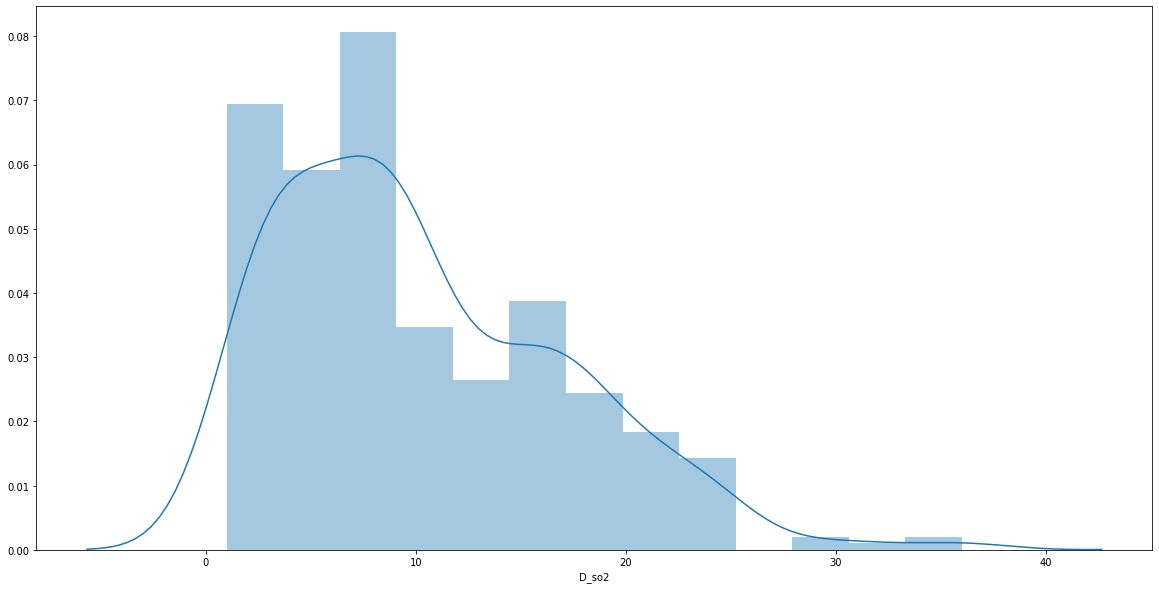

In [112]:
plt.figure(figsize=(20,10))
plt.tight_layout()
seabornInstance.distplot(d['D_so2'])

In [114]:
X = d['H_so2'].values.reshape(-1,1)
y = d['D_so2'].values.reshape(-1,1)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [116]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
print(regressor.intercept_)
print(regressor.coef_)

[9.10682477]
[[0.1720888]]


In [118]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,1.0,9.278914
1,2.0,9.278914
2,17.0,9.278914
3,7.0,9.795180
4,11.0,9.967269
...,...,...
68,8.0,12.032334
69,7.0,10.311446
70,3.0,12.376512
71,8.0,9.623091


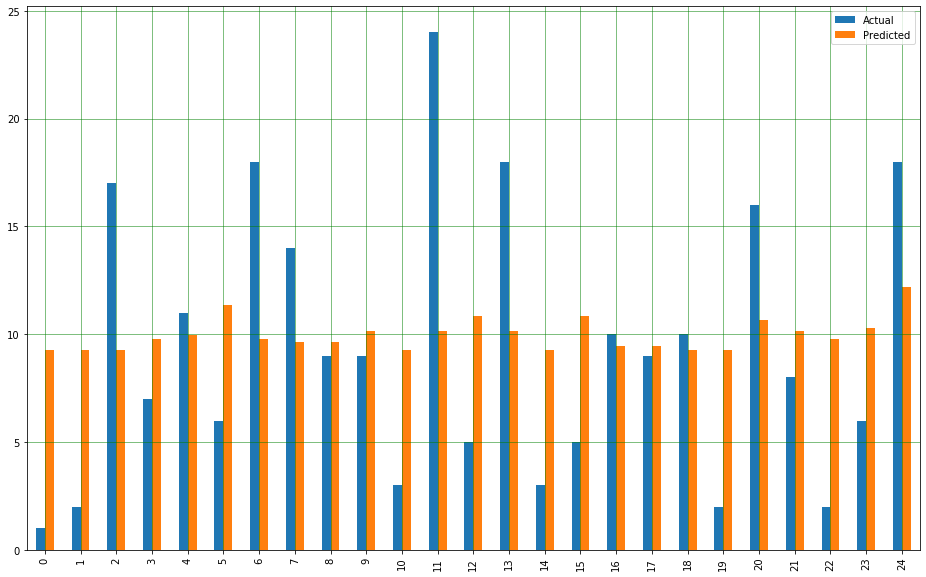

In [119]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

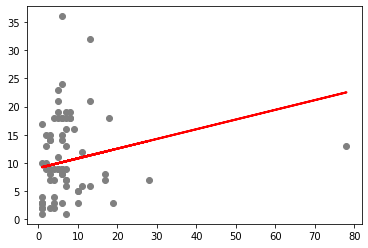

In [120]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [121]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.9842360790964175
Mean Squared Error: 53.667263551939115
Root Mean Squared Error: 7.325794397329147
